Lab | Customer Analysis Round 4

In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the marketing_customer_analysis.csv file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the files_for_lab folder.

Get the data
Use the jupyter file from the last lab (Customer Analysis Round 3)

Complete the following task
1) Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

2) Now we will try to check the normality of the numerical variables visually
    2.1) Use seaborn library to construct distribution plots for the numerical variables
    2.2) Use Matplotlib to construct histograms
    2.3) Do the distributions for different numerical variables look like a normal distribution
    
3) For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

4) Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [4]:
#1) Check the data types of the columns. 
# Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 
# (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\Usuari\Documents\IRONHACK\Work\Labs\01 semana\2023-03-09\marketing_customer_analysis.csv")
df.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [5]:
df.dtypes

Unnamed: 0                         int64
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size    

In [6]:
numericals= df.select_dtypes(include=np.number)
numericals

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [7]:
numericals = numericals.drop("Unnamed: 0", axis=1) # quitamosla primera columna que parece un conteo
numericals

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [8]:
categoricals=df.select_dtypes(exclude=["int64", "float64"])
categoricals

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


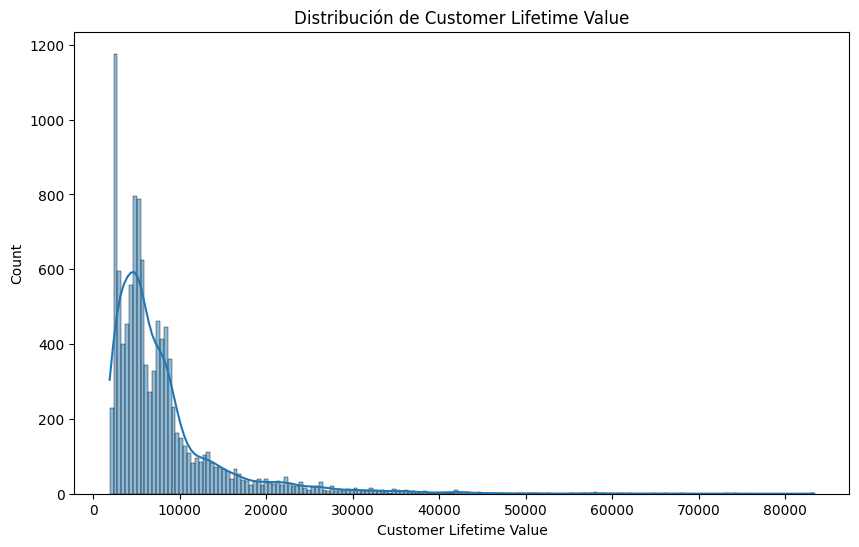

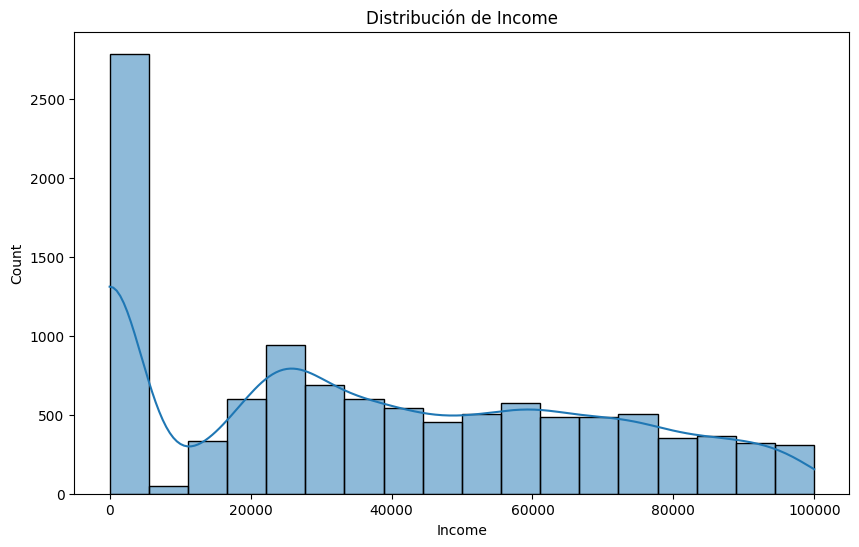

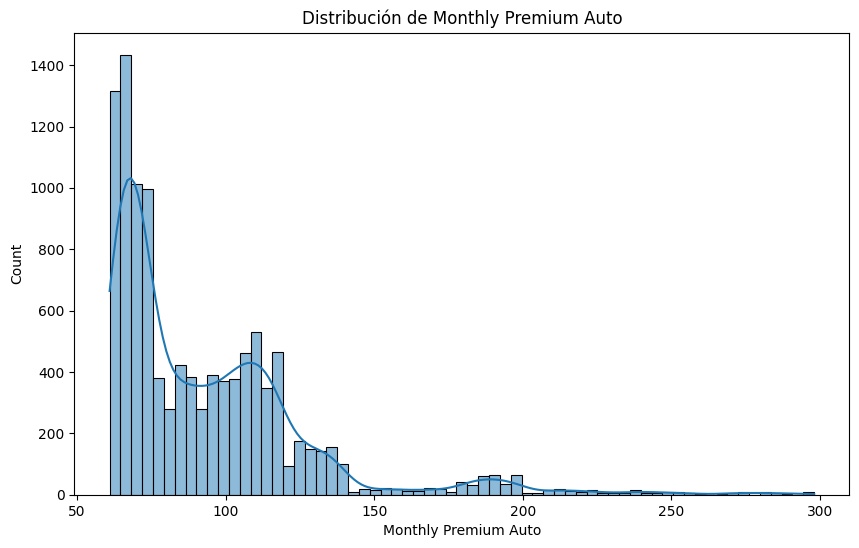

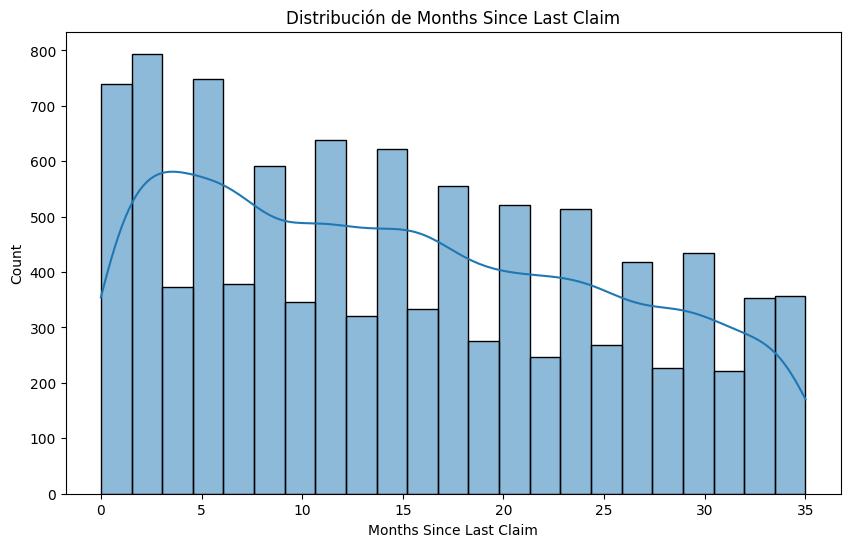

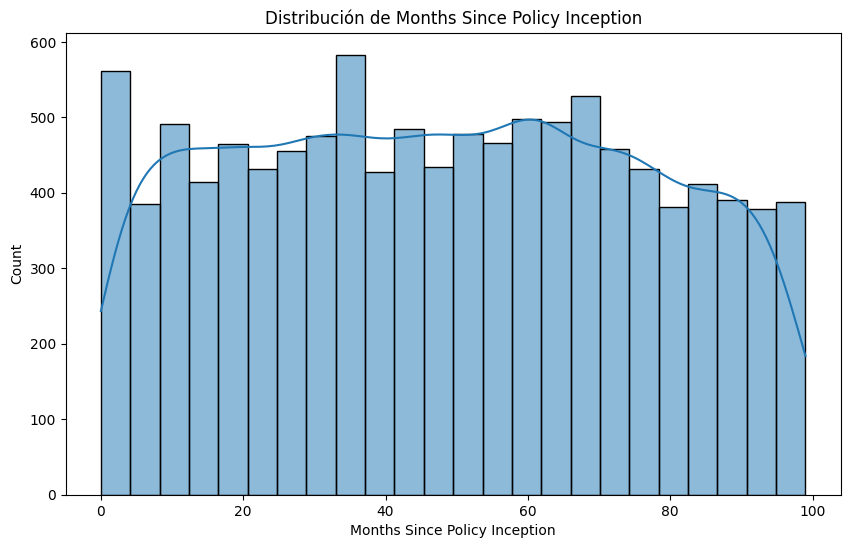

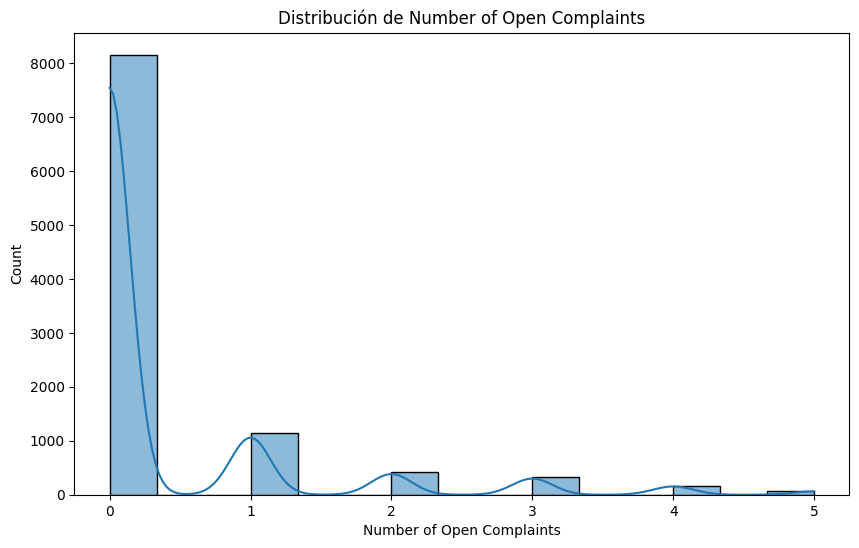

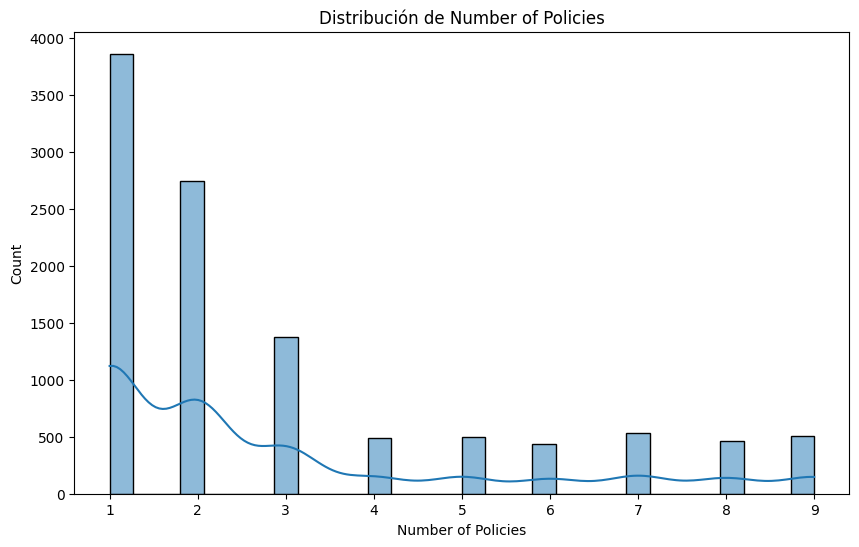

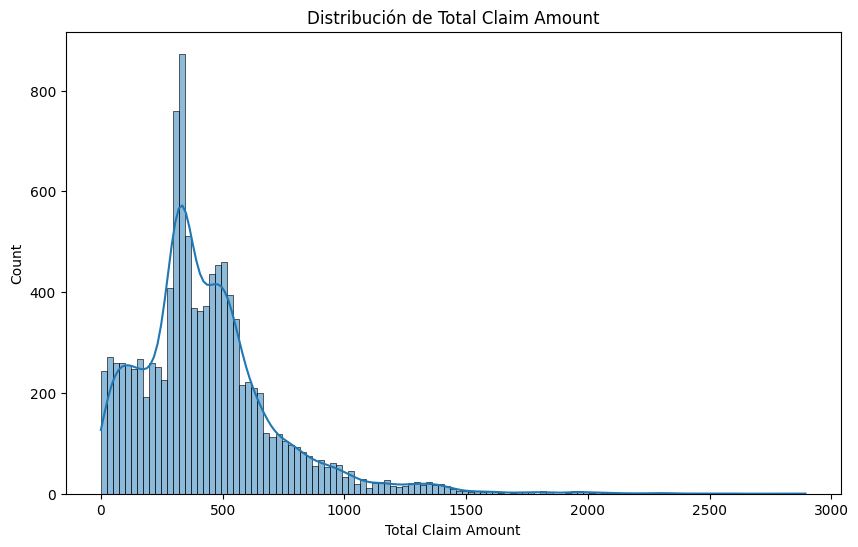

In [9]:
#2) Now we will try to check the normality of the numerical variables visually
    #2.1) Use seaborn library to construct distribution plots for the numerical variables
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

for columna in numericals.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(numericals[columna], kde=True)
    plt.title(f'Distribución de {columna}')
    plt.show()

In [10]:
 #2.2) Use Matplotlib to construct histograms
    #2.3) Do the distributions for different numerical variables look like a normal distribution

In [11]:
import matplotlib.pyplot as plt

In [12]:
from sklearn.preprocessing import MinMaxScaler #Has de importar esta libreria para normalizar
for column in numericals:
    scaler=MinMaxScaler()
    normal_num=scaler.fit_transform(numericals)

In [13]:
normal_num

array([[0.03575222, 0.48038127, 0.        , ..., 0.        , 1.        ,
        0.10117067],
       [0.00405905, 0.        , 0.01265823, ..., 0.        , 0.        ,
        0.25744525],
       [0.16026441, 0.22143207, 0.16455696, ..., 0.        , 0.125     ,
        0.16587544],
       ...,
       [0.27012165, 0.3984457 , 0.5907173 , ..., 0.        , 0.125     ,
        0.13176269],
       [0.12371724, 0.64207199, 0.4092827 , ..., 0.8       , 0.625     ,
        0.21367431],
       [0.06090719, 0.        , 0.16877637, ..., 0.        , 0.25      ,
        0.35311812]])

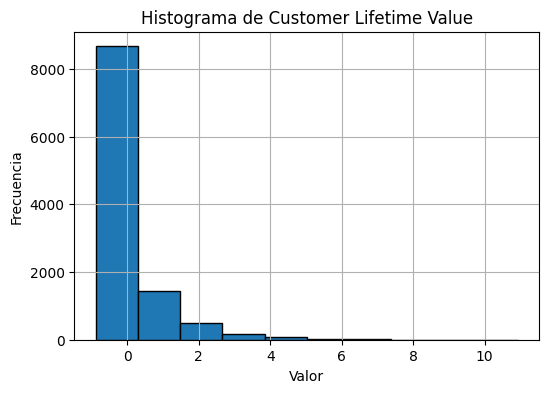

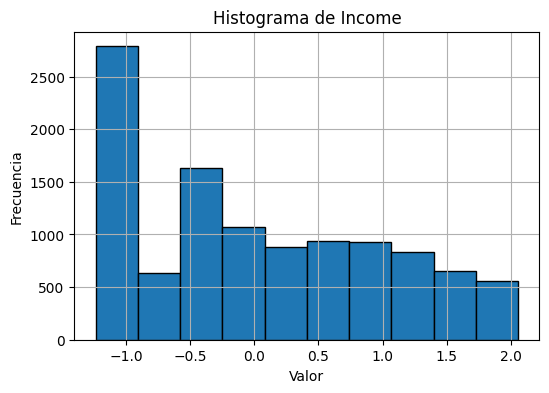

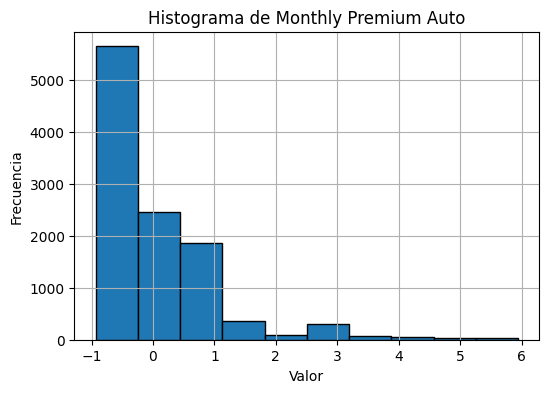

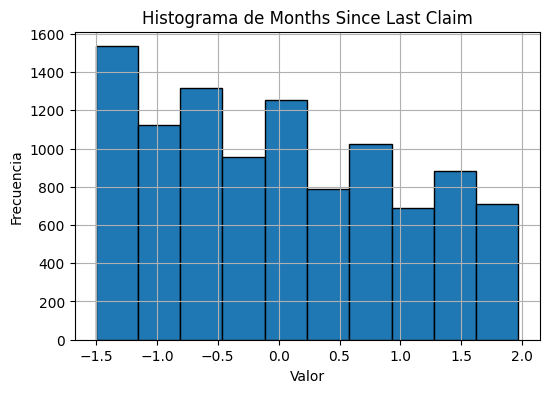

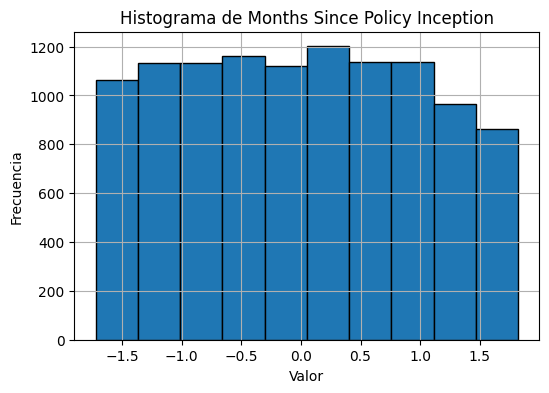

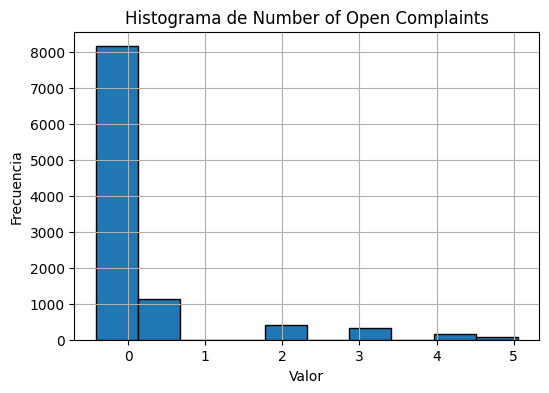

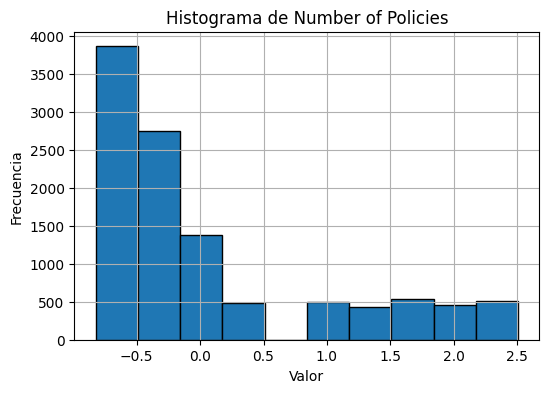

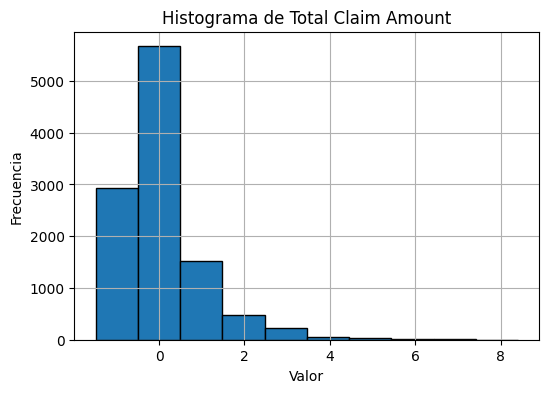

In [14]:
# Normalización Z-score utilizando NumPy
num_z_score = (numericals - numericals.mean()) / numericals.std()

# Crear un gráfico para cada columna normalizada
for col in num_z_score.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(num_z_score[col], bins=10, edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

 3) For the numerical variables, check the multicollinearity between the features. 
 Please note that we will use the column total_claim_amount later as the target variable.

La multicolinealidad --> fenómeno en el análisis de regresión donde 2 o más variables predictoras están altamente correlacionadas entre sí. Esto puede causar varios problemas en el análisis de regresión, incluyendo:

- Dificultad en la interpretación de coeficientes (se vuelve difícil determinar el impacto único de cada variable en la variable de respuesta).

- Inestabilidad en los coeficientes (pequeños cambios en los datos causan cambios significativos en los coeficientes estimados --> resultados del modelo menos confiables/menos robustos).

- Amplificación del error estándar: puede causar estimaciones sesgadas y aumento en el error estándar --> pruebas de significancia sean menos confiables.

- Sobreajuste: puede hacer que el modelo se ajuste demasiado a los datos de entrenamiento --> baja capacidad de generalización del modelo a nuevos datos.

¿Como analizarla? matriz de correlación entre las vbles predictoras (para identificar cuales estan correl) ".corr()" --> (-1,1)

In [15]:
matriz_correl=numericals.corr()
matriz_correl

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.028306,0.403069,0.016052,0.016960,-0.032243,0.016024,0.232626
Income,0.028306,1.000000,-0.009788,-0.023814,-0.005903,0.007163,-0.009960,-0.354141
Monthly Premium Auto,0.403069,-0.009788,1.000000,0.008744,0.018953,-0.010350,-0.020505,0.631799
Months Since Last Claim,0.016052,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137
Months Since Policy Inception,0.016960,-0.005903,0.018953,-0.039318,1.000000,0.004376,-0.009123,0.003095
Number of Open Complaints,-0.032243,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379
Number of Policies,0.016024,-0.009960,-0.020505,0.007678,-0.009123,0.004098,1.000000,-0.008923
Total Claim Amount,0.232626,-0.354141,0.631799,0.013137,0.003095,-0.011379,-0.008923,1.000000


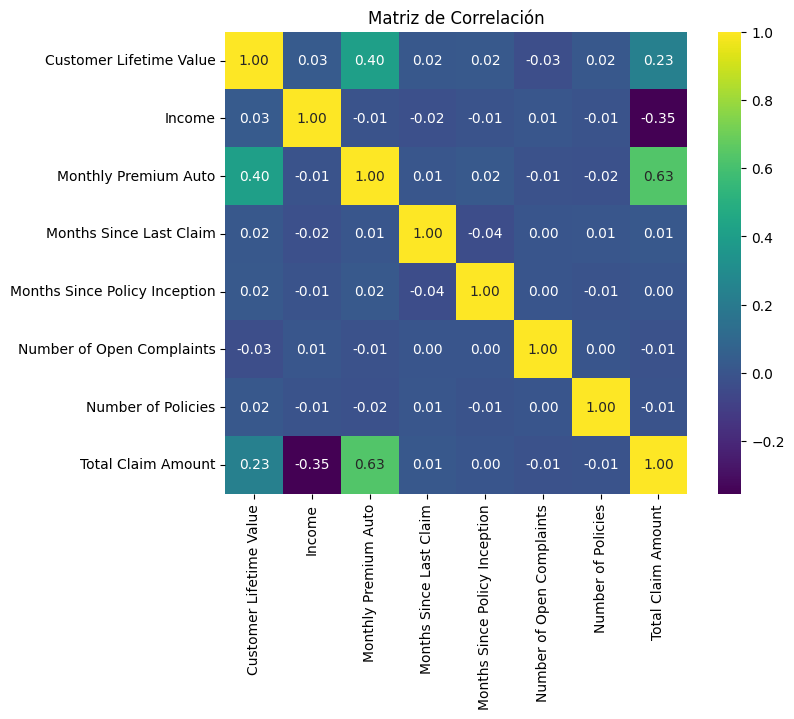

In [16]:
# 4) Drop one of the two features that show a high correlation between them (greater than 0.9). 
# Write code for both the correlation matrix and for seaborn heatmap. 
#If there is no pair of features that have a high correlation, then do not drop any features


plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correl, annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title('Matriz de Correlación')
plt.show()